In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# To convert in pandas dataframes

boston = pd.DataFrame(boston.data)
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


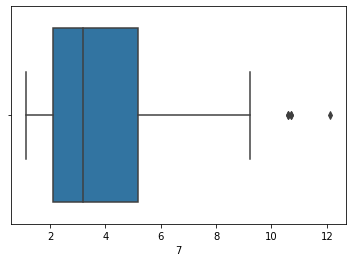

In [7]:
# PLot the boxplot to see the outliers
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = boston[7]) # it will create boxplot for index 7 collumn
# there are 3 outliers shown in boxplot

In [8]:
# 2nd technique
boston_1 = boston

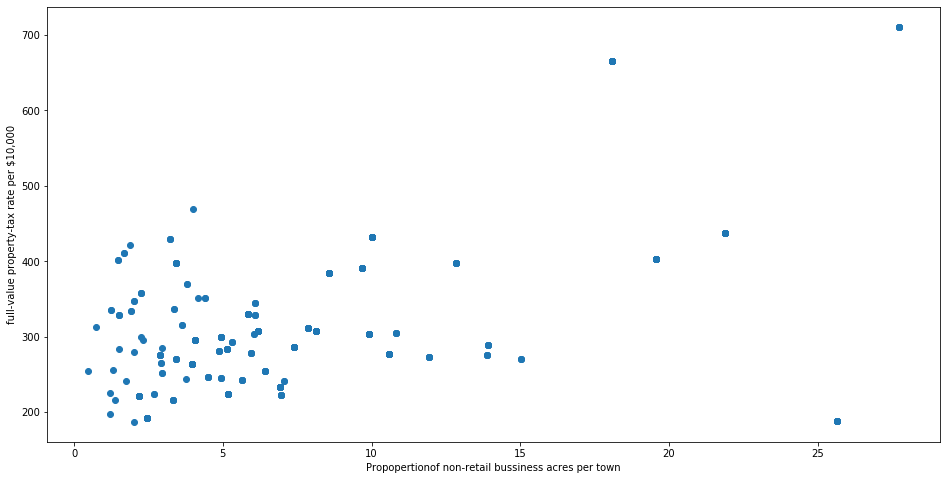

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_1[2],boston_1[9])
ax.set_xlabel('Propopertionof non-retail bussiness acres per town')
ax.set_ylabel('full-value property-tax rate per $10,000')
plt.show()

In [16]:
# find Z-score value
from scipy import stats
zscore = np.abs(stats.zscore(boston_1))
print(zscore)

[[4.19781939e-01 2.84829861e-01 1.28790950e+00 2.72598567e-01
  1.44217433e-01 4.13671889e-01 1.20013416e-01 1.40213603e-01
  9.82842857e-01 6.66608209e-01 1.45900038e+00 4.41051933e-01
  1.07556230e+00]
 [4.17339264e-01 4.87722365e-01 5.93381013e-01 2.72598567e-01
  7.40262207e-01 1.94274453e-01 3.67166419e-01 5.57159875e-01
  8.67882504e-01 9.87329485e-01 3.03094148e-01 4.41051933e-01
  4.92439366e-01]
 [4.17341592e-01 4.87722365e-01 5.93381013e-01 2.72598567e-01
  7.40262207e-01 1.28271368e+00 2.65811761e-01 5.57159875e-01
  8.67882504e-01 9.87329485e-01 3.03094148e-01 3.96426994e-01
  1.20872740e+00]
 [4.16750416e-01 4.87722365e-01 1.30687771e+00 2.72598567e-01
  8.35283838e-01 1.01630251e+00 8.09888511e-01 1.07773662e+00
  7.52922151e-01 1.10611514e+00 1.13032096e-01 4.16162839e-01
  1.36151682e+00]
 [4.12481846e-01 4.87722365e-01 1.30687771e+00 2.72598567e-01
  8.35283838e-01 1.22857665e+00 5.11179707e-01 1.07773662e+00
  7.52922151e-01 1.10611514e+00 1.13032096e-01 4.41051933e-0

In [17]:
#now we will fix the threshold by which we can get that perticular raw whhose zscore is according to our given value...
threshold = 3
import numpy as np
print(np.where(zscore>3))   # it give the two array (1)row  (2)collumn  

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [18]:
print(zscore[57][1])

3.8042344444270246


In [19]:
boston_iqr = boston
Q1 = boston_iqr.quantile(0.25)
Q3 = boston_iqr.quantile(0.75)
iqr = Q3 - Q1
print(iqr)

0       3.595038
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64


In [20]:
print(boston_iqr < (Q1 - 1.5 * iqr)) | boston_iqr > (Q3 + 1.5 * iqr)

         0      1      2      3      4      5      6      7      8      9  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

        10     11     12  
0    False  False  False  
1    False  False  Fa

TypeError: cannot compare a dtyped [float64] array with a scalar of type [NoneType]

In [24]:
# removing outliers
boston_clean = boston
boston_clean = boston_clean[(zscore < 3).all(axis=1)]

In [25]:
boston.shape

(506, 13)

In [26]:
boston_clean.shape

(415, 13)

In [28]:
# we can remove outliers using iqr..